# Getting Started

このページではこれからPythonで機械学習等の勉強をしていくにあたって、必要となる以下の知識について解説します。

* jupyter notebook
* NumPy
* Pandas
* matplotlib

---

## Jupyter Notebook

jupyter notebookは「Pythonのコード等を記述するセル」と「Markdownで文章が記述出来るセル」があります。
これらの機能によってソースコードだけでなく解説や実行結果も一緒に管理できるというメリットがあります。

**ここはMarkdown モードです**

Jupyter Notebook上ではVim等でも使用される *j*, *k* のキーによって移動ができます。
基本的には`Enter`で編集、`Shift + Enter`で実行だけ覚えておけばいいかと思います。
ここでは操作方法に関してあまり詳しい説明はいれません。コマンドモードで`h`を押すとすぐにヘルプを表示できるので、動かしながら慣れていきましょう。

In [1]:
# ここはPythonのコードです。実行すると結果も合わせて表示されます
print('Hello World')

Hello World


### Magic Functions

- `%quickref`: Magic Functionsの一覧
- `%env`: 環境変数の一覧
- `%pwd`: working directory
- `%save ファイル名 1-3`: ファイルに保存
- `!コマンド`: システムコマンドの実行

In [2]:
%pwd

'/home/jovyan/work'

In [3]:
!pwd

/home/jovyan/work


### SlideShow

また「View」>「Cell Toolbar」>「SlideShow」からスライドショーにした時の表示も変更することができ、
この資料も下記のコマンドによってスライドショーで表示することができます。

```
$ ipython nbconvert --to slides notebooks/getting-started.ipynb --post serve
```

---

## NumPy

配列や行列の演算を高速に行うライブラリ。
Numpyの内部はC言語で実装されているため，普通にPythonで実装した時と比較するとはるかに高速に実行することが可能。
今日紹介するツールの多くはNumPyを基盤として開発されています。

### 配列に対する操作

In [4]:
import numpy as np
numbers = [1, 2, 3, 4, 5]
np.mean(numbers)

3.0

In [5]:
np.std(numbers)

1.4142135623730951

### N次元配列オブジェクト

`numpy.array()`関数によって、N次元配列(nd-array)を生成できる。
このオブジェクトは行列演算が非常に簡単に表現できる他、`mean()` で平均値、`std()` で標準偏差求めたり、`corrcoef()`で相関係数求めたり出来る。

In [6]:
import numpy as np
data = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])

In [7]:
data

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [8]:
data**2

array([[ 0,  1,  4],
       [ 9, 16, 25],
       [36, 49, 64]])

行列演算がforループとかなしで容易に記述できます。

In [9]:
data.mean()

4.0

In [10]:
data.std()

2.5819888974716112

平均値や標準偏差などを計算する便利なメソッドも用意されています

---

## Pandas

多くの機能が提供されていますが、特に **Series** と **DataFrame** というリッチなデータ構造が便利です。
ここではひとまず DataFrame のみ紹介します。

In [11]:
import pandas as pd
data = np.arange(16).reshape((4, 4))
df = pd.DataFrame(data, index=['M', 'E', 'C', 'A'], columns=['one', 'two', 'three', 'four'])
df

,one,two,three,four
M,0,1,2,3
E,4,5,6,7
C,8,9,10,11
A,12,13,14,15


### データの選択処理

データの選択処理については、pandasのコミッタをされている sinhrks さんのブログ記事が詳しいです。
ここでは最低限知っておかないと行けない簡単な選択方法についてのみ解説します。

- [Python pandas データ選択処理をちょっと詳しく <前編>](http://sinhrks.hatenablog.com/entry/2014/11/12/233216)
- [Python pandas データ選択処理をちょっと詳しく <中編>](http://sinhrks.hatenablog.com/entry/2014/11/15/230705)    
- [Python pandas データ選択処理をちょっと詳しく <後編>](http://sinhrks.hatenablog.com/entry/2014/11/18/003204)

In [12]:
df.index

Index(['M', 'E', 'C', 'A'], dtype='object')

In [13]:
df.columns

Index(['one', 'two', 'three', 'four'], dtype='object')

In [14]:
df.ix[['M', 'E']]

,one,two,three,four
M,0,1,2,3
E,4,5,6,7


In [15]:
df.ix[['M', 'E'], ['one', 'two']]

,one,two
M,0,1
E,4,5


In [16]:
df.ix[1:3, 2:4]

,three,four
E,6,7
C,10,11


In [17]:
df[df > 5]

,one,two,three,four
M,NaN,NaN,NaN,NaN
E,NaN,NaN,6,7
C,8,9,10,11
A,12,13,14,15


In [18]:
df[df['one'] > 5]

,one,two,three,four
C,8,9,10,11
A,12,13,14,15


### CSV形式のデータをDataFrameに変換

CSV形式のデータをDataFrameに変換することは多くあります。
ローカルのデータもインターネット上のデータも `pd.read_csv` コマンドを使うことでDataFrameに変換出来ます。

またデータを書き出す際は、 `df.to_csv()` メソッドを呼び出すことで可能です。

In [19]:
df = pd.read_csv('./cars.csv', index_col=0)

In [20]:
df.describe()

,speed,dist
count,50.000000,50.000000
mean,15.400000,42.980000
std,5.287644,25.769377
min,4.000000,2.000000
25%,12.000000,26.000000
50%,15.000000,36.000000
75%,19.000000,56.000000
max,25.000000,120.000000


---

# matplotlib

Pythonで定番のデータ可視化ライブラリです。
高度なことが行えますが、少し扱いが難しいため個人的にはmatplotlibをベースとしたseaborn等を使用するのが良いかと思います。

In [21]:
%matplotlib inline
from matplotlib import rcParams, pyplot as plt

In [22]:
params = {
    'font.family': 'serif',
    'font.size': 13,
    'legend.fontsize': 11,
    'axes.linewidth': 2.0,
    'ytick.labelsize': 9,
    'xtick.labelsize': 9
}
rcParams.update(params)

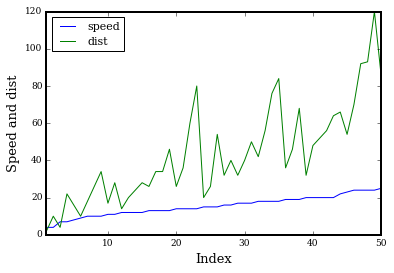

In [23]:
df.plot()
plt.ylabel('Speed and dist')
plt.xlabel('Index')
plt.legend(loc='best')

画像の保存は `plt.savefig('image.png')` を実行すればOKです。
画像形式は拡張子から自動で判断してくれます。

---

# Jupyter Notebookの公開

GitやGistにアップロードしてURLをトップページに貼り付けるだけで、簡単にページを公開できます。
最近はGithub自身もJupyter Notebookのレンダリングに対応したため、出番は少なくなりましたが数式等が少し崩れる場合があるためその時はこちらを利用するといいと思います。

* http://nbviewer.ipython.org/